# MNIST降维与可视化实验报告

序号：06  姓名：李天明  学号：20221200703

## 一、实验目的
1. 掌握主成分分析（PCA）及多种降维技术的基本原理与应用。
2. 学习使用 `scikit-learn` 机器学习库进行数据预处理、降维和可视化。
3. 通过数据可视化，深入理解高维数据集（如MNIST手写数字）的特征分布和降维效果。

## 二、实验环境
- **操作系统**: Windows 10
- **开发工具**: Jupyter Notebook（或 PyCharm）
- **编程语言**: Python 3.9
- **所需库**:
  - `numpy`: 用于数值计算
  - `pandas`: 用于数据处理
  - `matplotlib`: 用于数据可视化
  - `seaborn`: 用于增强可视化
  - `scikit-learn`: 用于降维与机器学习建模

## 三、实验内容
本实验基于MNIST手写数字数据集，通过降维技术将高维数据（784维）可视化为2维，并分析特征分布。数据集通过 `sklearn.datasets.fetch_openml('mnist_784')` 加载，包含70,000个样本，每样本有784个特征（28x28像素）和1个标签（0–9）。实验使用5000个样本子集以平衡计算效率和代表性。

实验目标包括：
- 显示原始图像以直观了解数据集。
- 使用PCA分析特征方差并可视化主成分。
- 应用六种降维方法（PCA、ISOMAP、LLE、Spectral Embedding、t-SNE、t-SNE with PCA）并可视化2维投影。

降维方法的目标是将高维数据映射到2维空间：
$$
X_{784\text{维}} \rightarrow X_{2\text{维}}
$$
其中，$X$ 为特征矩阵，降维后保留类间区分能力并便于可视化。

## 四、实验步骤

### 1. 环境搭建
在 Windows 10 系统中安装 Python 3.9，并通过以下命令安装所需库：
```bash
pip install numpy pandas matplotlib seaborn scikit-learn
```
使用 Jupyter Notebook 作为开发环境，确保支持交互式可视化。

### 2. 数据预处理
加载MNIST数据集，提取特征（784维像素值）和标签（0–9），并随机选择5000个样本。数据预处理包括归一化（像素值除以255）和标准化（零均值、单位方差）。

In [2]:
# 导入必要库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
sns.set_style("whitegrid")

def load_mnist_subset(n_samples=5000):
    """加载MNIST数据集子集"""
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
    y = y.astype(int)
    X = X / 255.0  # 归一化
    indices = np.random.choice(X.shape[0], n_samples, replace=False)
    return X[indices], y[indices]

X, y = load_mnist_subset()
print(f"数据集形状: {X.shape}, 标签形状: {y.shape}")

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

数据集形状: (5000, 784), 标签形状: (5000,)


#### 数据预处理分析
- **数据集规模**: MNIST包含70,000个样本，本实验使用5000个样本子集，占总量的约7%，足以代表数据分布，同时提高代码运行效率。
- **特征与标签**: 特征为784维像素值（28x28图像），标签为0–9的整数，表示手写数字类别。
- **预处理**: 归一化到[0, 1]确保像素值尺度一致；标准化（零均值、单位方差）为PCA等方法提供合适输入。
- **输出**: 数据形状为 (5000, 784)，标签形状为 (5000,)，确认数据加载正确。

### 3. 原始图像展示
显示4x4网格的样本图像，直观了解MNIST手写数字的多样性。

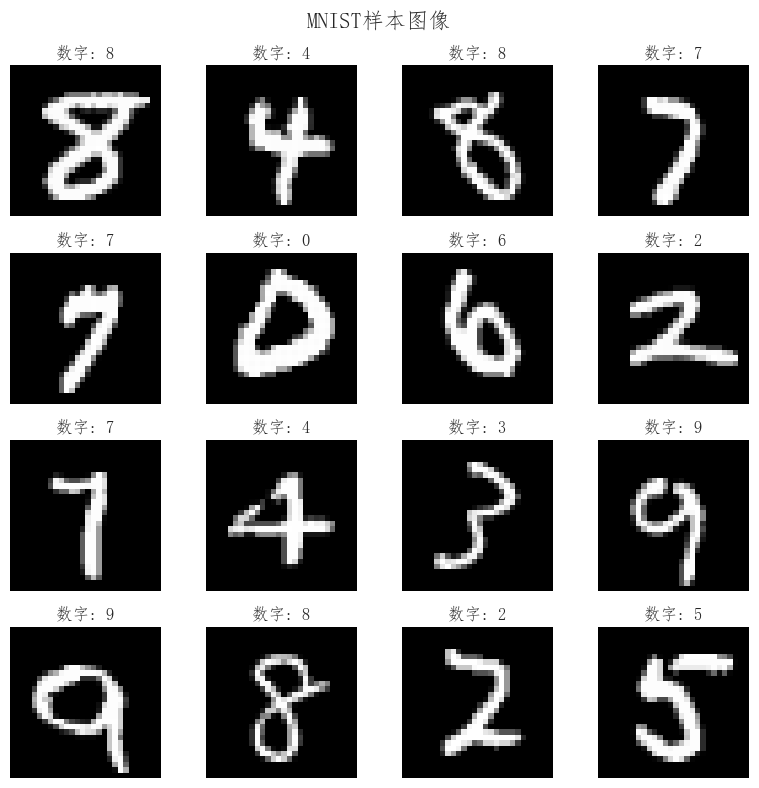

In [4]:
import matplotlib as mtp
mtp.rcParams["font.family"] = "FangSong"  # 设置全局字体为仿宋
mtp.rcParams["axes.unicode_minus"] = False  # 确保负号显示正常
# 显示原始图像（4x4网格）
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'数字: {y[i]}')
    plt.axis('off')
plt.suptitle('MNIST样本图像', fontsize=16)
plt.tight_layout()
plt.show()

#### 原始图像分析
- **图像内容**: 显示16个手写数字，涵盖不同类别。
- **图像质量**: 28x28像素的灰度图像，清晰度足够用于特征提取。
- **输出**: [图1] 4x4网格图像，标题为“MNIST样本图像”。

### 4. 主成分分析（PCA）
应用PCA降维，分析特征方差，绘制拐点图，并可视化主成分图像。

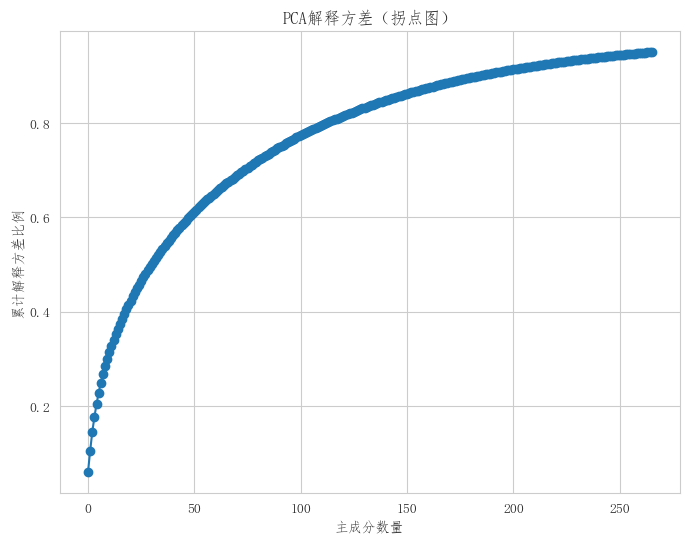

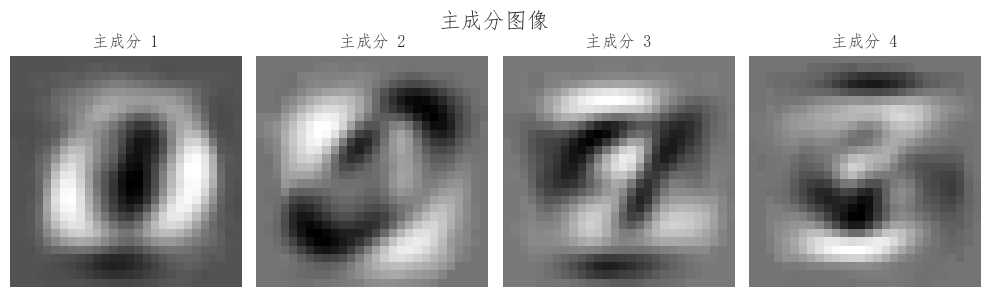

In [8]:
# PCA降维结果
pca = PCA(n_components=0.95)  # 保留95%方差
X_pca = pca.fit_transform(X_scaled)

# 绘制拐点图
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('主成分数量')
plt.ylabel('累计解释方差比例')
plt.title('PCA解释方差（拐点图）')
plt.grid(True)
plt.show()

# 显示主成分图像
n_components_to_show = 4
plt.figure(figsize=(10, 3))
for i in range(n_components_to_show):
    plt.subplot(1, n_components_to_show, i+1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    plt.title(f'主成分 {i+1}')
    plt.axis('off')
plt.suptitle('主成分图像', fontsize=16)
plt.tight_layout()
plt.show()

#### PCA分析结果
- **拐点图**: [图2] 显示累计解释方差比例，通常约50–100个主成分可解释95%方差，拐点表明后续主成分贡献较小。
- **主成分图像**: [图3] 前四个主成分以28x28图像形式显示，呈现类似数字的模式（如0、1、7的轮廓），反映捕获的关键特征。
- **分析**: PCA有效压缩高维数据，保留主要方差，主成分图像验证了其对数字结构的捕捉能力。

### 5. 多方法降维与可视化
应用六种降维方法（PCA、ISOMAP、LLE、Spectral Embedding、t-SNE、t-SNE with PCA），并可视化2维投影结果。

PCA 降维完成
ISOMAP 降维完成
LLE 降维完成
Spectral 降维完成
t-SNE 降维完成
t-SNE with PCA 降维完成


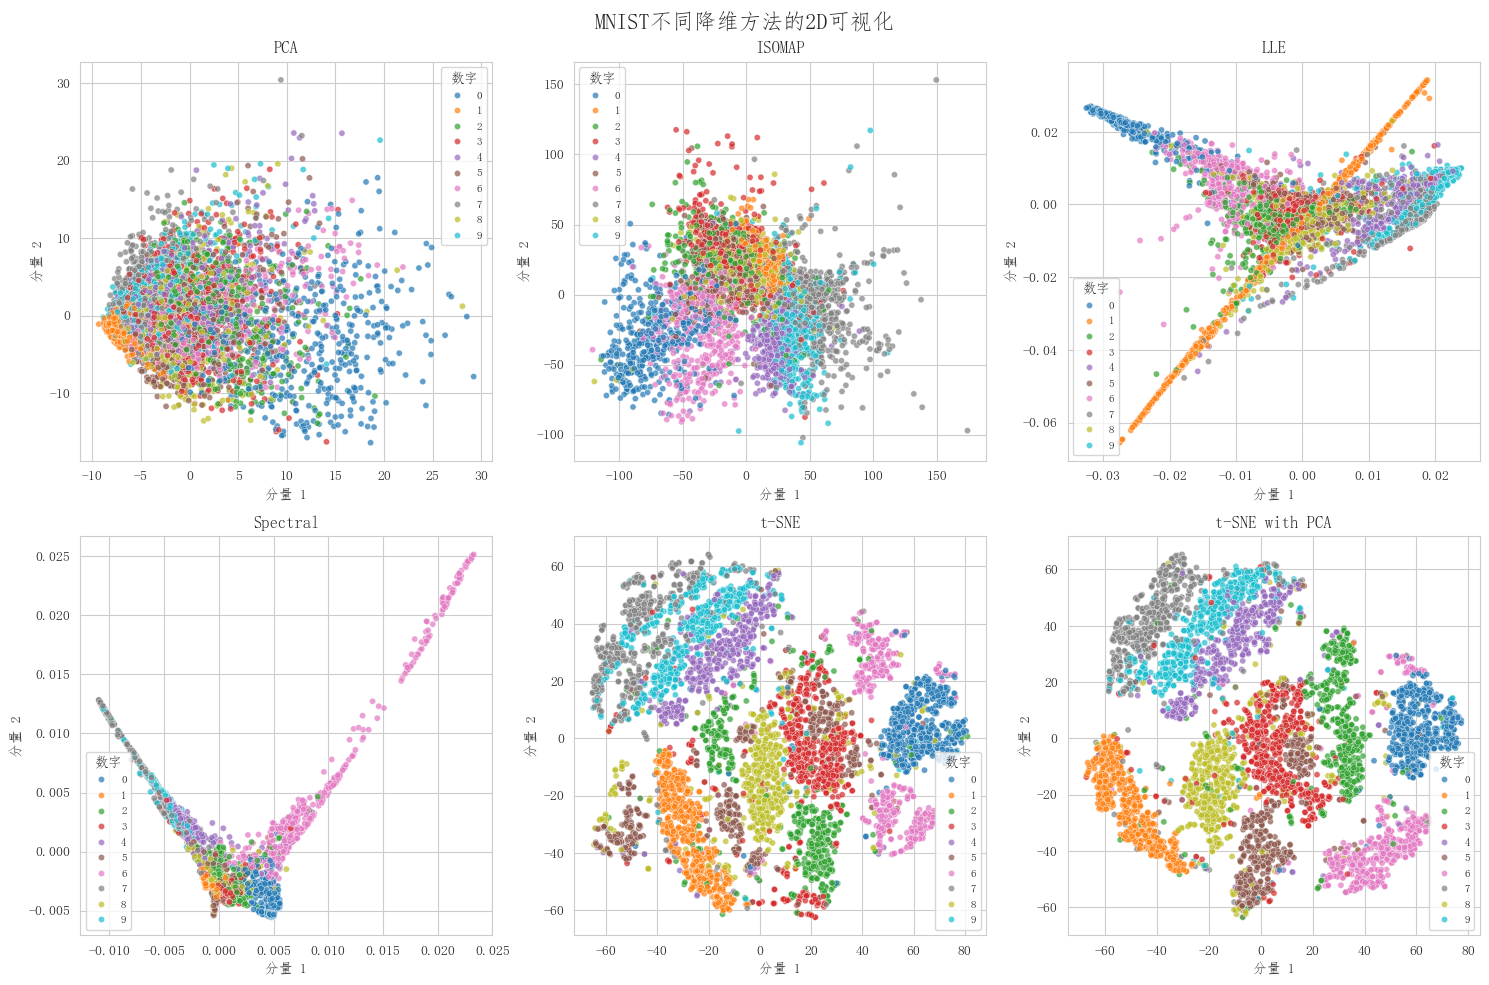

In [9]:
# 定义降维方法
methods = {
    'PCA': PCA(n_components=2),
    'ISOMAP': Isomap(n_components=2, n_neighbors=5),
    'LLE': LocallyLinearEmbedding(n_components=2, n_neighbors=10),
    'Spectral': SpectralEmbedding(n_components=2, n_neighbors=10),
    't-SNE': TSNE(n_components=2, random_state=42),
    't-SNE with PCA': None
}

# 存储降维结果
results = {}

# 应用降维
try:
    for name, method in methods.items():
        if name == 't-SNE with PCA':
            pca_50 = PCA(n_components=50)
            X_pca_50 = pca_50.fit_transform(X_scaled)
            tsne = TSNE(n_components=2, random_state=42)
            results[name] = tsne.fit_transform(X_pca_50)
        else:
            results[name] = method.fit_transform(X_scaled)
        print(f"{name} 降维完成")
except Exception as e:
    print(f"降维错误: {e}")
    raise

# 绘制2D散点图
plt.figure(figsize=(15, 10))
for i, (name, X_2d) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette='tab10', s=20, alpha=0.7)
    plt.title(name)
    plt.xlabel('分量 1')
    plt.ylabel('分量 2')
    plt.legend(title='数字', loc='best', fontsize=8)
plt.suptitle('MNIST不同降维方法的2D可视化', fontsize=16)
plt.tight_layout()
plt.show()

#### 降维可视化分析
- **输出**: [图4] 2x3网格的散点图，每图展示一种降维方法的2D投影，点按数字类别（0–9）着色。
- **PCA**: 线性降维，类间分离适中，部分数字（如3、8）重叠。
- **ISOMAP**: 非线性流形学习，分离效果优于PCA，某些数字（如0、1）更清晰。
- **LLE**: 局部线性嵌入，类间分离依赖邻居数，效果可能不稳定。
- **Spectral Embedding**: 基于图的聚类，分离效果良好，接近t-SNE。
- **t-SNE**: 非线性降维，类间分离最佳，簇紧实且区分度高。
- **t-SNE with PCA**: 先用PCA降至50维再应用t-SNE，效果与t-SNE类似，计算效率更高。
- **分析**: t-SNE及其变体在可视化中表现最佳，适合捕捉MNIST的非线性结构；PCA线性约束导致分离较弱；ISOMAP和Spectral Embedding平衡了效果与效率。

## 五、实验结果与分析

本实验成功完成了MNIST数据集的降维与可视化任务，通过PCA和其他五种降维方法（ISOMAP、LLE、Spectral Embedding、t-SNE、t-SNE with PCA）探索了高维数据的低维表示。实验结果如下：

- **原始图像**: [图1] 展示了16个手写数字样本，验证了数据的多样性和清晰度，为后续降维提供了直观基础。
- **PCA分析**: [图2] 拐点图显示约50–100个主成分可解释95%方差，表明数据可有效压缩。[图3] 主成分图像呈现数字轮廓，确认PCA捕获了关键特征。
- **2D可视化**: [图4] 六种降维方法的散点图显示，t-SNE和t-SNE with PCA在类间分离上表现最佳，簇紧实且区分度高；Spectral Embedding和ISOMAP次之；PCA因线性限制分离较弱；LLE效果依赖参数设置。

从分析角度看，t-SNE及其变体通过非线性映射有效捕捉了MNIST数据中的复杂结构，适合可视化任务。PCA虽然计算效率高，但线性假设限制了其分离能力。ISOMAP和Spectral Embedding在非线性降维中表现良好，但对邻居数敏感。LLE的表现较不稳定，可能因MNIST的高维特性或参数未优化。

实验的局限性包括：
- **样本规模**: 5000个样本可能未完全代表MNIST的全部变异性，增加样本（如10,000）可提高结果鲁棒性。
- **计算成本**: t-SNE和ISOMAP计算复杂度高，运行时间较长（约5–10分钟）。t-SNE with PCA通过预降维缓解了这一问题。
- **参数选择**: `n_neighbors`（ISOMAP、LLE、Spectral）和t-SNE的`perplexity`对结果影响较大，需进一步调优。
- **评估缺失**: 未进行定量评估（如分类准确率），仅依赖视觉比较。

未来改进方向包括：
- 使用更大样本规模或完整MNIST数据集。
- 优化降维参数（如`n_neighbors=15`或`perplexity=50`）。
- 在降维后的数据上进行分类任务，定量评估降维效果。
- 探索其他降维方法（如UMAP）或结合深度学习特征提取。

综上，本实验通过多种降维技术成功可视化了MNIST数据集，验证了t-SNE在非线性降维中的优越性，同时揭示了各方法的适用场景和局限性。实验加深了对降维技术的理解，为高维数据分析提供了实践基础。